# Raditya Fahritama - Assignment 5



# 1

### Problem Statement
the problem states to perform following actions:

1.	Perform EDA on the data 
2.	Build models to predict Labels by Naive Bayes and Decision Tree with 70/30 ratio

###### input:
- Breast Cancer Data set

###### output:
- EDA of data
- Models and Evaluation on the breast cancer dataset by Naive Bayes and Decision Tree


### Solution Design
1. create basic EDA of data
2. check missing values on the data.
3. check correlation of data
4. split the data 70/30 
5. normalize the data
6. create the confusion matrix and classification report for evaluation

###### assumption:
Everything goes well and is done and finished as required


### Code

In [1]:
#!/usr/bin/ python3

"""this code section is to load the data"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


#import the csv file
df = pd.read_csv(r"D:/COURSE MATERIALS/Analytic Python/assignment 5/breastcancer.csv")
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


we can see that the shape of the dataframe is 116 rows with 10 columns

In [2]:
#check null values in data
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

we can see that there is no null value found in the data. so we don't have to perform anything here.

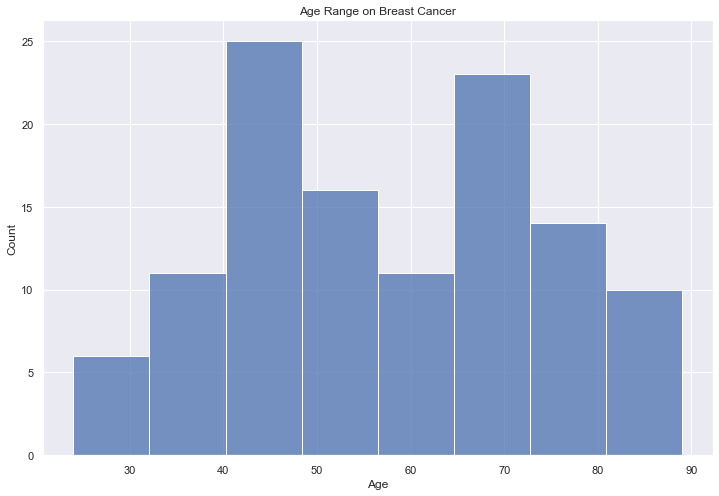

In [32]:
#create histogram to see age range of breast cancer patient
sns.histplot(data=df, x="Age")
plt.title("Age Range on Breast Cancer")
plt.show()

we can see that the people's ages that present the most in the data are patients in age range from 40 to 50. followed by people in age range of mid 60 to early 70. 

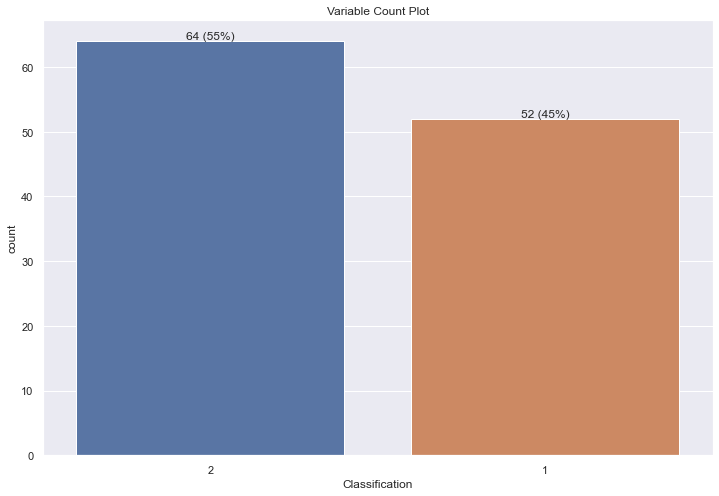

In [3]:
"""this chunk is to see the classification distribution in the data"""

#function to plot the classification count plot
def countplot():
    sns.set(rc={'figure.figsize':(12,8)})

    ax = sns.countplot(x=df['Classification'],
                       order=df['Classification'].value_counts(ascending=False).index)

    abs_values = df['Classification'].value_counts(ascending=False)
    rel_values = df['Classification'].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)
    plt.title("Variable Count Plot")
    plt.show()

#call the function
countplot()

We can see from the plot, the classification distribution is not balanced. with patient class makes more presence than the healthy control people. I decided to balance this problem with random upsampling. 

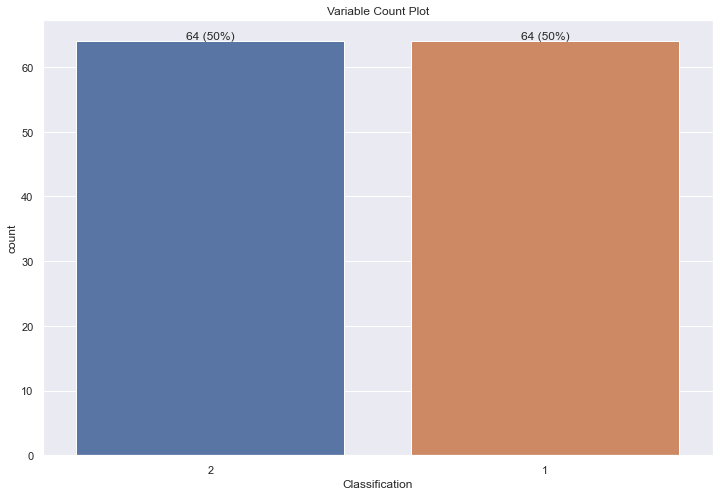

In [25]:
"""this chunk is to upsample the minority class"""

from sklearn.utils import resample

#assign major and minor class
df_majority = df[df.Classification==2]
df_minority = df[df.Classification==1]

#apply random resample based on major class count
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=64,    
                                 random_state=123) 

#concat the result into df
df = pd.concat([df_majority, df_minority_upsampled])
countplot()

we can see that after data upsampling, the count for both of classes is now balanced. we can now advance with the data

In [4]:
"""this chunk is to get the correlation in the data"""

#getting correlation in dataframe
dfcorr = df.corr()
dfcorr.style.background_gradient(cmap='YlOrRd')

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


we can see that majority of columns has correlation coefficient near zero. there are some columns that is highly correlated. HOMA and insulin. with correlation coefficient more than 0.9. but i decided not to remove these columns because i want to use all of predictors that are available in the data. 

In [6]:
"""this section is for data modeling"""

#import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

#splitting the data 70/30
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Classification'], axis=1), 
                                                    df['Classification'],
                                                    test_size = 0.3,
                                                    shuffle =True,random_state =42)


In [7]:
#assign scaler for train data
ss = StandardScaler()

#assign different train set for scaled data
X_train= pd.DataFrame(ss.fit_transform(x_train), columns = x_train.columns)
X_test= pd.DataFrame(ss.fit_transform(x_test), columns = x_train.columns)

In [8]:
"""this function is to fit the gaussian naive bayes and evaluate the score"""

def gaussiannb(x,y,a,b):
    gnb = GaussianNB()
    gnb.fit(x,y)
    print("%.2f"%gnb.score(a,b))
    return gnb

In [9]:
"""this function is to fit the decision tree and evaluate the score"""

def decisiontree(x,y,a,b):
    dt = DecisionTreeClassifier()
    dt.fit(x,y)
    print("%.2f"%dt.score(a,b))
    return dt

In [10]:
"""this function is to plot the confusion matrix of the model"""

def confmat(cm):
    ax = sns.heatmap(cm, annot=True, cmap='YlOrBr')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['Healthy Control', 'Patient'])
    ax.yaxis.set_ticklabels(['Healthy Control', 'Patient'])

    plt.show()

In [11]:
"""this function is to perform simple evaluation to get accuracy and classification report"""

def simpleeval(x,y,m):
    pred = m.predict(x)
    score=accuracy_score(y,pred)
    print('Accuracy : %.5f'%score)
    print(classification_report(y, pred, target_names = ['Healthy Control', 'Patient']))

# Gaussian Naive Bayes without scaling

In [116]:
#call the function for naive bayes
gnmod = gaussiannb(x_train,y_train,x_test,y_test)

0.64


In [117]:
#call the fucnction for naive bayes model evaluation
simpleeval(x_test,y_test,gnmod)

Accuracy : 0.64103
                 precision    recall  f1-score   support

Healthy Control       0.62      0.80      0.70        20
        Patient       0.69      0.47      0.56        19

       accuracy                           0.64        39
      macro avg       0.65      0.64      0.63        39
   weighted avg       0.65      0.64      0.63        39



we can see that the accuracy for the first model is not so great. only 64%. and we can see that the recall for patient class is so low. meaning that the model mistaken healthy control for patient the most. 

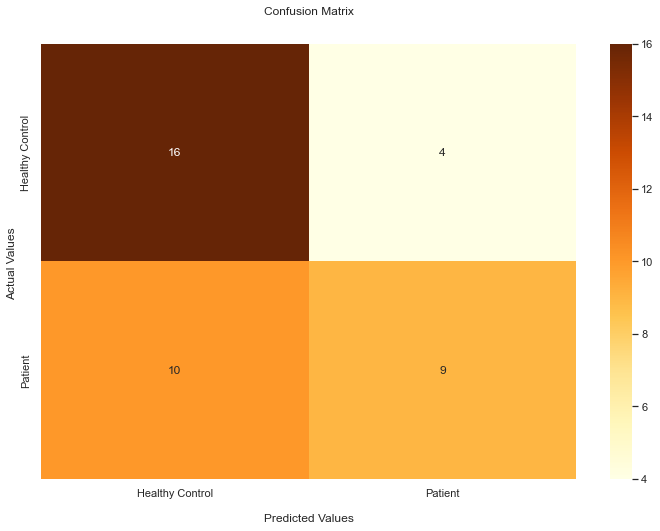

In [118]:
#predict the model and call the confusion matrix function
pred = gnmod.predict(x_test) 
confm = confusion_matrix(y_test,pred)
confmat(confm)

visualization of the model evaluation. we can see that the error rate is more on the false negative side. in this case, the model mistaken healthy control for patient class. 

# Gaussian Naive Bayes with scaling

In [119]:
#call the function for naive bayes with data scaling
gnmodscal = gaussiannb(X_train,y_train,X_test,y_test)

0.69


In [120]:
#call the fucnction for naive bayes scaled model evaluation
simpleeval(X_test,y_test,gnmodscal)

Accuracy : 0.69231
                 precision    recall  f1-score   support

Healthy Control       0.63      0.95      0.76        20
        Patient       0.89      0.42      0.57        19

       accuracy                           0.69        39
      macro avg       0.76      0.69      0.67        39
   weighted avg       0.76      0.69      0.67        39



we can see that even the accuracy is not so great, the accuracy was improved 5% from the model without scaling. we can assume that data scaling has impact on increasing the accuracy. precision on patient and recall on healthy control increased significantly. but the precision and recall on the vice versa is still the same. 

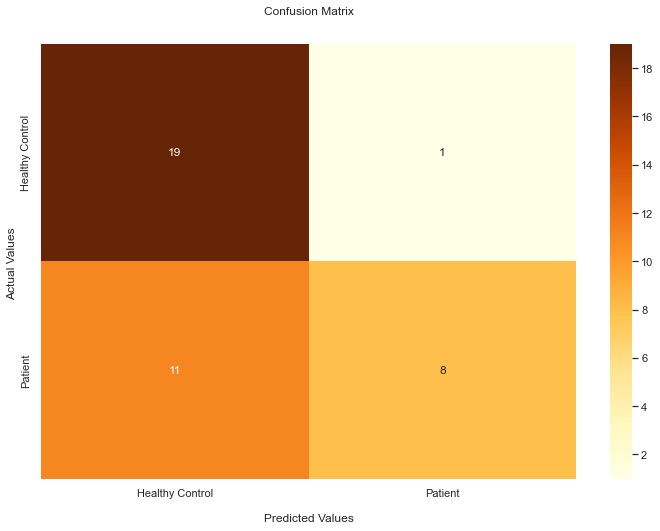

In [121]:
#predict the model and call the confusion matrix function
pred2 = gnmodscal.predict(X_test) 
confm2 = confusion_matrix(y_test,pred2)
confmat(confm2)

we can see that the error rate still on the false negative side. eventhough the error on the false positive side is reduced. 

# Decision Tree without scaling

In [12]:
#call the function for decision tree
dtmod = decisiontree(x_train,y_train,x_test,y_test)

0.77


In [13]:
#call the fucnction for decision tree model evaluation
simpleeval(x_test,y_test,dtmod)

Accuracy : 0.77143
                 precision    recall  f1-score   support

Healthy Control       0.80      0.71      0.75        17
        Patient       0.75      0.83      0.79        18

       accuracy                           0.77        35
      macro avg       0.78      0.77      0.77        35
   weighted avg       0.77      0.77      0.77        35



we can see that the accuracy is better than the naive bayes with 77% accuracy. we can see that the the lowest score in the report is recall on the healthy control. meaning that the model mistook healthy control for patient the most

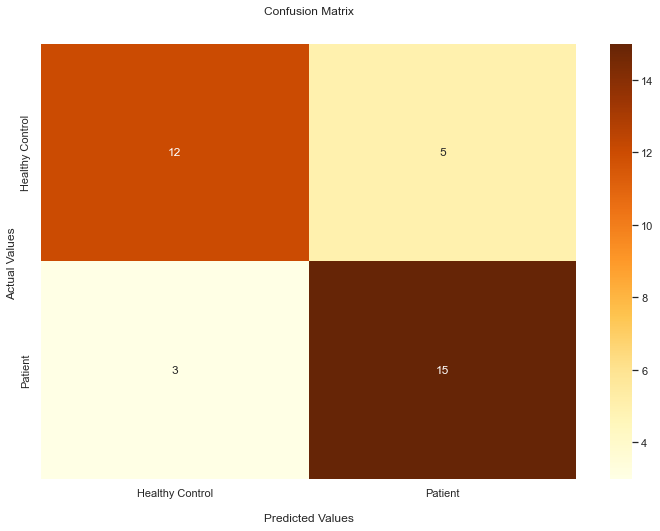

In [14]:
#predict the model and call the confusion matrix function
pred3 = dtmod.predict(x_test) 
confm3 = confusion_matrix(y_test,pred3)
confmat(confm3)

Visualization of the model. we can see that the error rate is more on the false positive side. in this case, the model mistook patient for healthy control the most. 

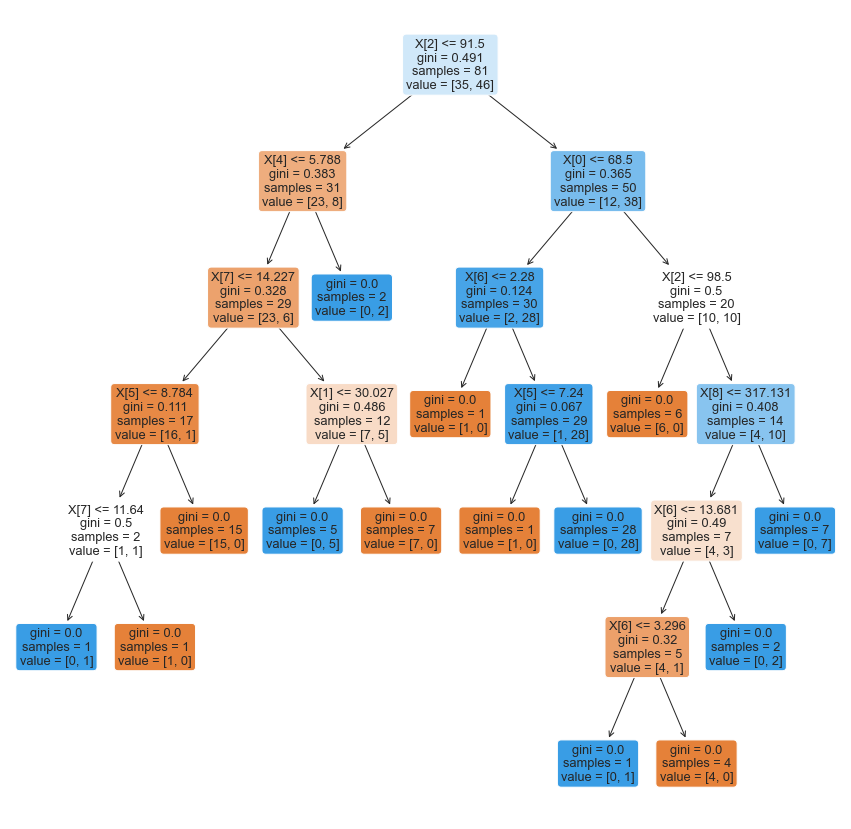

In [15]:
#create plot for decision tree model
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(dtmod, filled = True, rounded = True)

we can see that the model reach 0 gini impurity in different branch of tree. the maximum tree reached is 6 step. and there are some leaves in 2 step and 4 step that has highest gini impurity. 

# Decision Tree with scaling

In [24]:
#call the function for decision tree
dtmodscal = decisiontree(X_train,y_train,X_test,y_test)

0.74


In [25]:
#call the fucnction for decision tree model evaluation
simpleeval(X_test,y_test,dtmodscal)

Accuracy : 0.74286
                 precision    recall  f1-score   support

Healthy Control       0.79      0.65      0.71        17
        Patient       0.71      0.83      0.77        18

       accuracy                           0.74        35
      macro avg       0.75      0.74      0.74        35
   weighted avg       0.75      0.74      0.74        35



we can see that the accuracy is decreased with data scaling by 3%. that is 74%. the lowest score on the report is still on the recall for healthy control class.  

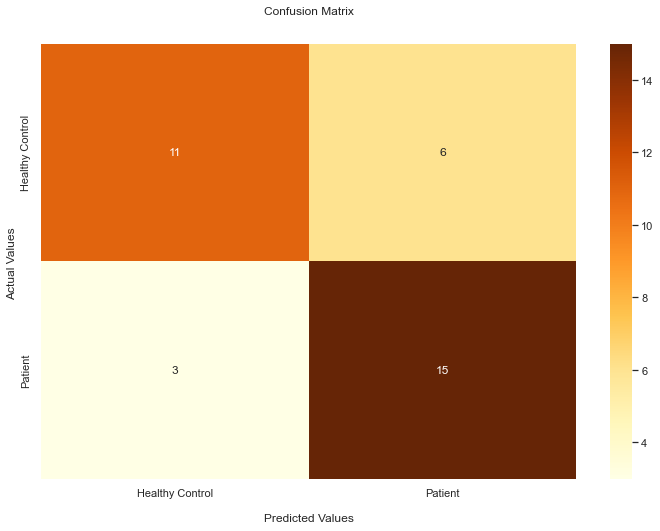

In [26]:
#predict the model and call the confusion matrix function
pred4 = dtmodscal.predict(X_test) 
confm4 = confusion_matrix(y_test,pred4)
confmat(confm4)

we can see that the confusion matrix is quite the same as the matrix without scaling. but the false positive count increased by 1 observation.

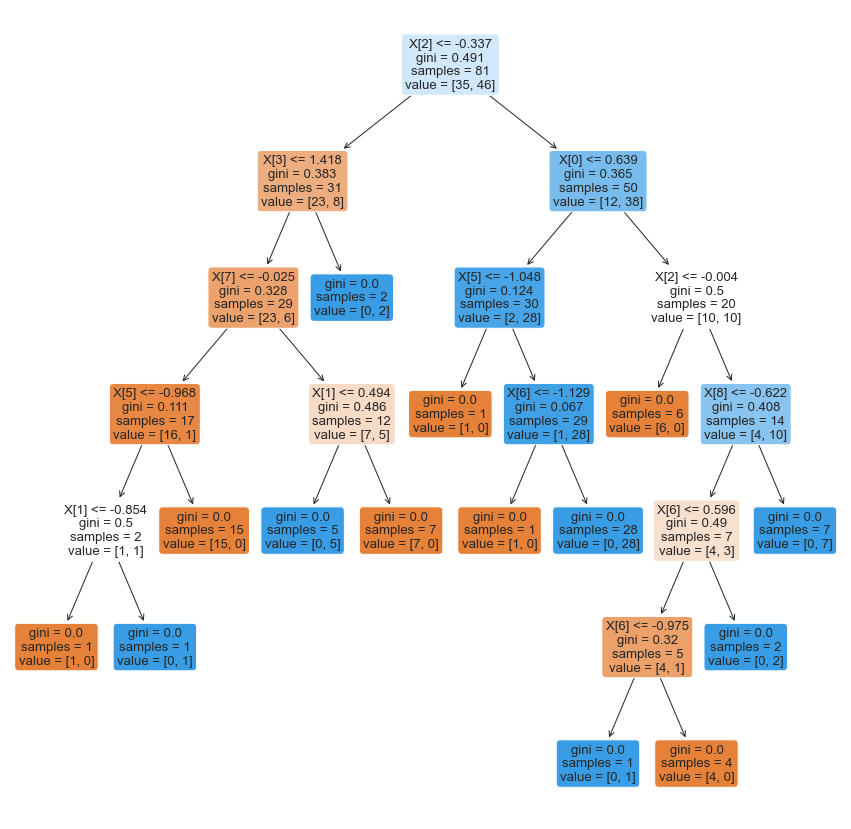

In [27]:
#create plot for decision tree model
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(dtmodscal, filled = True, rounded = True)

we can see that the tree plot for both scaled and unscaled is the same in structure. but different estimator in decision split. 

### Testing & Exception Handling

###### testing:
- run the program as it is (normal case)


###### exception handling:
- no exception handling performed



### Discussion

the program seems to run the intended solution well based on the output that it provided. I suspected that the low accuracy is due to the hyperparameter. i didn't use best parameter for all the model and just fit the model as it is. i also separate model with scaling and no scaling to see the effect of data scaling for both of the models. turn out that the effect is quite different for both algorithm. the program solved the problem statement of the question number 1. 

# 2

### Problem Statement
the problem states to perform:
1.	EDA on the data and remove a column.
2.	Cross Validation to linear regression model to predict total
3.	Cross Validation to tree regression model to predict total

main aim of the problem is to predict total based on 16 voice measures

   
###### input:
Parkinsons Telemonitoring Data Set

###### output:
1. EDA of the data
2. model and evaluation with cross validation of linear regression
3. model and evaluation with cross validation of decision tree regression


### Solution Design

1. import the data
2. create basic EDA on the data
3. split the data to train test set
4. cross validate to get best parameter on the regressor
5. fit the model and evaluate the model based on error values


###### assumption:
Everything goes well and is done and finished as required


### Code

In [31]:
#!/usr/bin/ python3

"""this code section is to load the data"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
from sklearn import metrics
import numpy as np

#import the csv file
df = pd.read_csv("parkinsons_updrs.txt")
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


we can see that the shape of df is 5875 observations with 22 columns

In [32]:
#drop the columns other than total UPDRS and 16 voice measures
df = df.drop(['subject#','age','sex','test_time','motor_UPDRS'], axis=1)
df

,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [33]:
#describe the data
df.describe()

,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


we can see that the column with highest standard deviation is the total_UPDRS itself. meaning that the variation of the values contained in that column vary much from the mean. 

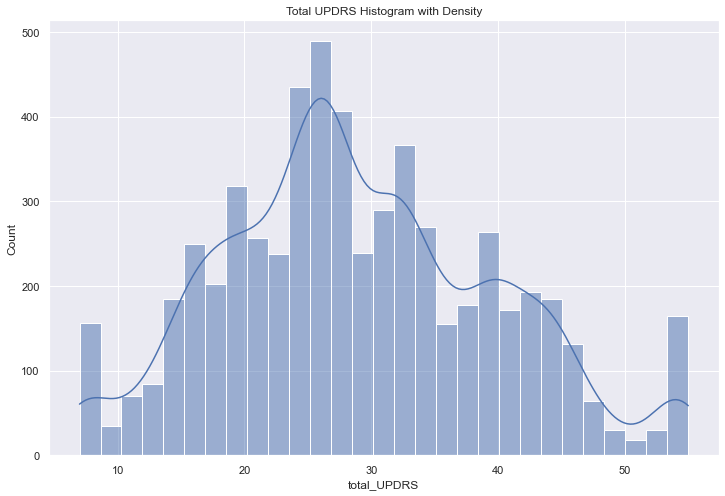

In [34]:
#create histogram for the total UPDRS
sns.histplot(data=df, x="total_UPDRS", kde=True)
plt.title('Total UPDRS Histogram with Density')
plt.show()

we can see from the histogram that the highest total is situated between 20 and 30. the density is also highest in the middle of the data. we can conclude that the data is following gaussian distribution. 

In [36]:
#checking correlation of data
dfcorr = df.corr()
dfcorr.style.background_gradient(cmap='YlOrRd')

,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
total_UPDRS,1.000000,0.074247,0.066927,0.064015,0.063352,0.064027,0.092141,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.074247,1.000000,0.865577,0.984181,0.968214,0.984184,0.709791,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.066927,0.865577,1.000000,0.844626,0.790538,0.844630,0.649046,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.064015,0.984181,0.844626,1.000000,0.947196,1.000000,0.681729,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.063352,0.968214,0.790538,0.947196,1.000000,0.947203,0.732747,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491
Jitter:DDP,0.064027,0.984184,0.844630,1.000000,0.947203,1.000000,0.681734,0.685556,0.650228,0.659833,0.603090,0.650227,0.792377,-0.641482,0.382886,0.214893,0.670660
Shimmer,0.092141,0.709791,0.649046,0.681729,0.732747,0.681734,1.000000,0.992334,0.979828,0.984904,0.935457,0.979827,0.795158,-0.801416,0.468235,0.132540,0.615709
Shimmer(dB),0.098790,0.716704,0.655871,0.685551,0.734591,0.685556,0.992334,1.000000,0.968015,0.976373,0.936338,0.968014,0.798077,-0.802496,0.472409,0.126111,0.635163
Shimmer:APQ3,0.079363,0.664149,0.623830,0.650226,0.676711,0.650228,0.979828,0.968015,1.000000,0.962723,0.885695,1.000000,0.732736,-0.780697,0.436878,0.130735,0.576704
Shimmer:APQ5,0.083467,0.694002,0.621401,0.659831,0.734021,0.659833,0.984904,0.976373,0.962723,1.000000,0.938935,0.962723,0.798173,-0.790638,0.450890,0.128038,0.593677


We can see that the majority of columns have high correlation to each other. with shimmer columns and jitter columns are all highly correlated to each other. but since the problem states to predict total updrs from 16 voice measures, i didn't do anything about this and just left it be. 

In [39]:
"""this section is to model the regressor"""

#import required modules
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(df.drop(['total_UPDRS'], axis=1), 
                                                    df['total_UPDRS'],
                                                    test_size = 0.2,
                                                    shuffle =True,random_state =42)

In [38]:
"""this function is to tune the parameter with randomized search cross validation"""

def partuning(x):
    rscv_fit = x.fit(x_train, y_train)
    best_parameters = rscv_fit.best_params_
    print(best_parameters)

In [37]:
"""this function is to create dataframe of actual, predicted, difference in actual and predicted, and percentage of difference"""

def predictdf(x):
    totalPredicted = x.predict(x_test)

    testdf = pd.DataFrame()
    testdf['actual'] = y_test
    testdf['predicted'] = totalPredicted
    testdf['diff'] = 0
    testdf['pctg'] = 0

    for i in range(0,len(testdf)):
               testdf['diff'].iloc[i] = abs(testdf['actual'].iloc[i] - testdf['predicted'].iloc[i])

    for i in range(0,len(testdf)) :
                testdf['pctg'].iloc[i] = (testdf['diff'].iloc[i]/testdf['actual'].iloc[i]) * 100
            
    testdf = testdf.reset_index(drop = True)
    return testdf, totalPredicted

In [41]:
"""this function is to get the evaluation of the model based on error values"""

def regressioneval(x,y,z):
    print("Maximum Error Value: " +"{:.2f}".format(max(x['diff'])))
    print("Minimum Error Value: " +"{:.2f}".format(min(x['diff'])))
    print("Average Error Value: "+"{:.2f}\n".format(statistics.mean(x['diff'])))
    print("Maximum Error Percentage: "+"{:.2f}".format(max(x['pctg'])))
    print("Minimum Error Percentage: "+"{:.2f}".format(min(x['pctg'])))
    print("Average Error Percentage: "+"{:.2f}\n".format(statistics.mean(x['pctg'])))
    print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y), 4))
    print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y), 4))
    print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y)), 4))
    print("(R^2) Score:", round(metrics.r2_score(y_test, y), 4))
    print(f'Train Score : {z.score(x_train, y_train) * 100:.2f}% and Test Score : {z.score(x_test, y_test) * 100:.2f}%')
    errors = abs(y - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('\nAccuracy:', round(accuracy, 2), '%.') 

# Linear Regression

In [42]:
#assign regressor
lr = LinearRegression()

#set parameter for linear regressor
param_lr = {
'fit_intercept': [True, False],  
'normalize': [True, False],  
'copy_X': [True, False], 
'positive': [True, False]
}

#assign randomized search cross validation to get best parameter
rscv = RandomizedSearchCV(estimator = lr, 
                          param_distributions = param_lr, 
                          cv = 10, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter=200)

In [325]:
#call parameter tuning function
partuning(rscv)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'positive': False, 'normalize': True, 'n_jobs': None, 'fit_intercept': True, 'copy_X': True}


In [326]:
#assign regressor with best parameter and fit the train data
lr = LinearRegression(positive = False, normalize = True, n_jobs = None, fit_intercept = True, copy_X = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [327]:
#call df function and assign dataframe from the return df
testdflr, lrtotalpred = predictdf(lr)
testdflr

,actual,predicted,diff,pctg
0,43.563,25.304785,18.258215,41.912208
1,12.060,29.858196,17.798196,147.580402
2,14.109,24.833281,10.724281,76.010211
3,16.517,27.305228,10.788228,65.315907
4,32.000,27.198247,4.801753,15.005477
...,...,...,...,...
1170,27.715,35.927046,8.212046,29.630329
1171,44.253,32.697966,11.555034,26.111300
1172,26.315,26.747143,0.432143,1.642191
1173,21.371,28.752010,7.381010,34.537502


In [338]:
#call model evaluation and accuracy
regressioneval(testdflr,lrtotalpred,lr)

Maximum Error Value: 29.21
Minimum Error Value: 0.01
Average Error Value: 8.30

Maximum Error Percentage: 327.54
Minimum Error Percentage: 0.05
Average Error Percentage: 36.41

Mean Absolute Error: 8.2956
Mean Squared Error: 101.9422
Root Mean Squared Error: 10.0966
(R^2) Score: 0.0801
Train Score : 10.46% and Test Score : 8.01%

Accuracy: 63.59 %.


we can see that the accuracy is only 63%. this is based on mean absolute percentage error. we can also see that the maximum error percentage is 327% and minimum error percentage is 0.05% and the average error percentage is 36%. i will conclude that this is not bad but not good either for regression problem. 

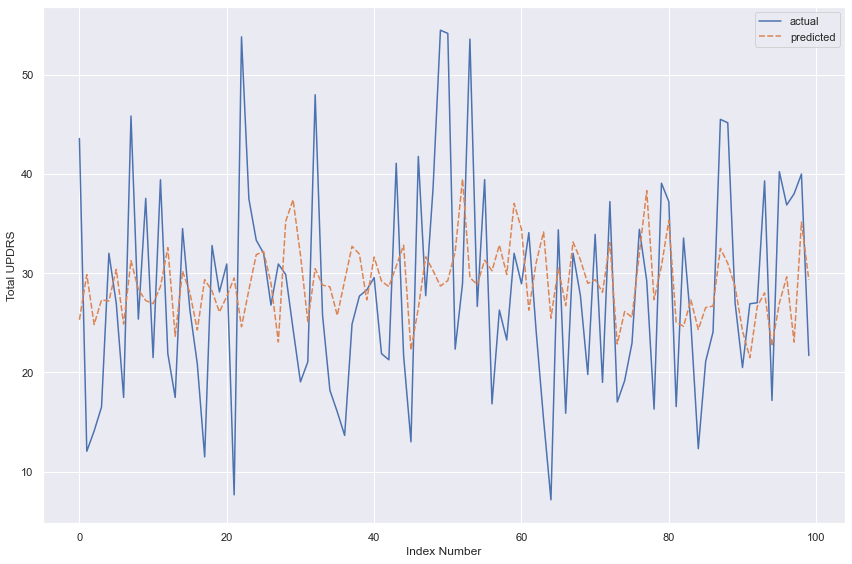

In [343]:
#create line plot for actual and predicted for first 100 data
ax = sns.lineplot(data=testdflr[["actual" , "predicted"]].iloc[0:100])
ax.set(xlabel='Index Number', ylabel='Total UPDRS')
plt.show()

we can see from the line plot, the variation is not even close to the actual line. the predicted line is more likely to be static towards the center while the actual plot has more varied osciliation in the line. 

# Decision Tree Regressor

In [330]:
#assign regressor
dr = DecisionTreeRegressor()

#assign parameter for decision tree regressor
param_dr = { 
'max_depth': np.arange(1, 20, 1),  
'min_samples_split': [2, 10, 20, 30, 40, 50], 
'min_samples_leaf': np.arange(1, 20, 2, dtype=int),  
'random_state': [1, 2, 30, 42],
'max_leaf_nodes': [None, 5, 10, 20],
}

#assign randomized search cross validation to get best parameter
rscv2 = RandomizedSearchCV(estimator = dr, 
                          param_distributions = param_dr, 
                          cv = 10, 
                          n_jobs=-1, 
                          verbose=2, 
                          n_iter=200)

In [331]:
#call parameter tuning function
partuning(rscv2)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
{'random_state': 2, 'min_samples_split': 50, 'min_samples_leaf': 11, 'max_leaf_nodes': None, 'max_depth': 7}


In [332]:
#assign regressor with best parameter and fit the train data
dr = DecisionTreeRegressor(random_state = 2, 
                           min_samples_split = 50, 
                           min_samples_leaf = 11, 
                           max_leaf_nodes = None, 
                           max_depth = 7)
dr.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=11, min_samples_split=50,
                      random_state=2)

In [333]:
#call df function and assign dataframe from the return df
testdfdr, drtotalpred = predictdf(dr)
testdfdr

,actual,predicted,diff,pctg
0,43.563,28.512062,15.050938,34.549821
1,12.060,28.512062,16.452062,136.418421
2,14.109,25.193444,11.084444,78.562935
3,16.517,28.173929,11.656929,70.575338
4,32.000,30.571317,1.428683,4.464635
...,...,...,...,...
1170,27.715,30.240721,2.525721,9.113192
1171,44.253,33.720109,10.532891,23.801529
1172,26.315,23.759263,2.555737,9.712092
1173,21.371,30.325885,8.954885,41.902040


In [339]:
#call model evaluation and accuracy
regressioneval(testdfdr,drtotalpred,dr)

Maximum Error Value: 38.58
Minimum Error Value: 0.01
Average Error Value: 7.45

Maximum Error Percentage: 368.41
Minimum Error Percentage: 0.03
Average Error Percentage: 32.86

Mean Absolute Error: 7.4491
Mean Squared Error: 89.713
Root Mean Squared Error: 9.4717
(R^2) Score: 0.1904
Train Score : 36.21% and Test Score : 19.04%

Accuracy: 67.14 %.


we can see that the accuracy is higher by 4% than linear regression. we can see that the average error percentage is also lower than linear regression. but the maximum error percentage is much higher than the maximum error that we have on the linear regression model. 

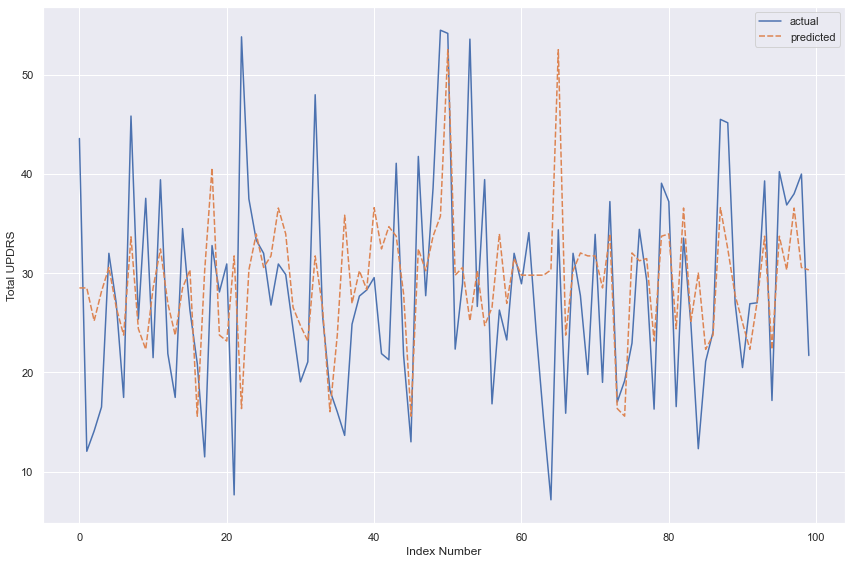

In [346]:
#create line plot for actual and predicted for first 100 data
ax = sns.lineplot(data=testdfdr[["actual" , "predicted"]].iloc[0:100])
ax.set(xlabel='Index Number', ylabel='Total UPDRS')
plt.show()

we can see that the actual and predicted line has pretty much close variation. the predicted line osciliate more than the linear regression trade. we can also see that the actual and predicted lines are pretty closed on the first 100 data. 

### Testing & Exception Handling

###### testing:
- run the program as it is (normal case)


###### exception handling:
- no exception handling performed




### Discussion
the program seems to run the intended solution well based on the output that it provided. the low accuracy that I got, i suspect that it is because the high correlated columns in the data. there are so many columns that are highly correlated that might affecting the model overall. I also didn't scale the data because i have tried and the results are much lower. so i didn't feature it in this problem. the program solved the problem statement of the question number 2. 